# Neural Networks and XOR

> Fitting a neural Network to the XOR function

- toc: true 
- badges: true
- comments: true
- author: Isaac Flath

This article is not an applied post like I usually write, but is more diving into why Neural Networks are so powerful.  The goal is to show an example of a problem that a Neural Network can solve easily that stricly linear models cannot solve.  We will do this in the simplest example, the XOR.

I will cover what an XOR is in this article, so there aren't any prerequisites for reading this article.  Though if this is your first time hearing of the XOR, you may not understand the implications or the importance of solving the XOR.

# Credit

I got the idea to write a post on this from reading the deep learning book.  The information covered in this post is also in that book, though the book covers more information and goes into more detail.  The primary benefit of this post over the book is that this post is in 'python pytorch' notation where the book covers this material in 'math' notation.  If this post is interesting to you, I would recommend checking out the book.


**The book can be found with this information:**

+ Title: Deep Learning
+ Author: Ian Goodfellow and Yoshua Bengio and Aaron Courville
+ Publisher: MIT Press
+ URL: http://www.deeplearningbook.org,
+ Year: 2016

# The Problem

In the graph below we see the XOR operator outputs.  XOR is similar to OR.  If either one of the bits is positive, then the result is positive.  The difference is that if both are positive, then the result is negative. 

We can see the 2 classes as red and blue dots on the visualization.  Try to draw a single line that divides the red dots from the blue dots and you will find that it cannot be done.  A linear model simply cannot classify these points accurately

In [1]:
#collapse-hide
from torch import Tensor
import torch
import pandas as pd
import matplotlib.pyplot as plt

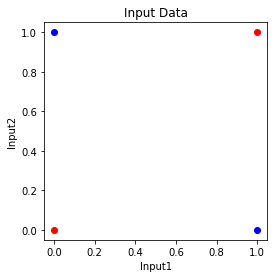

In [2]:
#collapse-hide
x = Tensor([[0,0],[0,1],[1,0],[1,1]])
y = [0,1,1,0]
out = pd.DataFrame(x,columns = ['x1','x2']); out['XOR'] = y

class1 = out[out.XOR==0].iloc[:,:2]; class2 = out[out.XOR==1].iloc[:,:2]
fig, ax = plt.subplots(figsize=(4,4))
ax.scatter(class1.x1,class1.x2,c='red'); ax.scatter(class2.x1,class2.x2,c='blue')
ax.set_xlabel('Input1'); ax.set_ylabel('Input2')
ax.set_title('Input Data')
plt.show()

# Neural Network Feature Space

Now that we see a linear model cannot solve the problem, or said another way it's not linearly seperable, let's see how a Neural Network would help.

We start by defining the tensors that we need:
+ x: This shows all the points and are the inputs we are using to predict with.  You can verify the points on the graph above.
+ w: This is the weight matrix.  A linear layer is xw + b.  
+ b: This is the bias.  A linear layer is xw + b
+ y: This is the dependent variable we are trying to predict (whether the dot is blue or red, or XOR operator output)

>Note: The text and some libraries do transposes to have wx + b, but it's the same thing. 

In [3]:
x = Tensor([[0,0],[0,1],[1,0],[1,1]])
y = [0,1,1,0]
w = torch.ones(2,2); 
b = Tensor([0,-1])

Now we do out linear layer with activation function and store that in h.
+ x@w + b : This is the linear function
+ torch.clip : This is replacing any negative values with 0.  The fancy term for this is a ReLU or Rectified Linear Unit

In [4]:
h = torch.clip(x@w + b,0)

Instead of plotting our inputs like we did above (when we saw this problem couldn't be solved linearly), let's plot the outputs of layer we just calculated.

As you can see when we plot the output of the first layer it's trivial to separate the blue and red points with a line.  We have created a represenation of the data that makes it very easy to classify the points to solve the XOR problem!

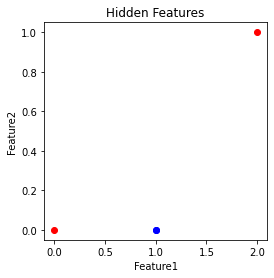

In [5]:
#collapse-hide
out = pd.DataFrame(h,columns = ['x1','x2']); out['XOR'] = y
class1 = out[out.XOR==0].iloc[:,:2]; class2 = out[out.XOR==1].iloc[:,:2]
fig, ax = plt.subplots(figsize=(4,4))
ax.scatter(class1.x1,class1.x2,c='red'); ax.scatter(class2.x1,class2.x2,c='blue')
ax.set_xlabel('Feature1'); ax.set_ylabel('Feature2')
ax.set_title('Hidden Features')
plt.show()

# Model Predictions

Now that it's linearly seperable, we can easily add an output layer to form out predictions.  All we do for this is multiply my another Tensor so that we get the correct number of outputs.  In this case we have 4 points we want to classify, so we have 4 outputs (1 per point).

We see that the model was able to solve the XOR problem

In [6]:
h = torch.clip(x@w + b,0) @ Tensor([1,-2])
res = pd.DataFrame(x.int().numpy(),columns=['x1','x2']); res['preds']=h.int(); res['targets']=y
res

,x1,x2,preds,targets
0,0,0,0,0
1,0,1,1,1
2,1,0,1,1
3,1,1,0,0
